# sigc tutorials

In [1]:
import sigc
import scanpy as sc
import anndata as ad
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

/Users/yuanzan/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [13]:
kegg_metabolism = sigc.metabolism_sigs(resources='KEGG')
display(kegg_metabolism.head(5))

,name,description,member
0,Glycolysis / Gluconeogenesis,00010,HK3
1,Glycolysis / Gluconeogenesis,00010,HK1
2,Glycolysis / Gluconeogenesis,00010,HK2
3,Glycolysis / Gluconeogenesis,00010,HKDC1
4,Glycolysis / Gluconeogenesis,00010,GCK


In [14]:
adata = ad.read_h5ad("/data/THU/srt.h5ad")
df = adata.to_df()
print(df.shape)

sig_mtx = sigc.sigc_score(df, kegg_metabolism, method="AUCell")

(577, 33538)


In [15]:
adata

AnnData object with n_obs × n_vars = 577 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'cell.type.v1', 'status', 'patient', 'Mye.ct', 'sub.ct', 'RNA_snn_res.0.5', 'RNA_snn_res.0.4', 'RNA_snn_res.0.7', 'RNA_snn_res.1', 'cell.type.sub2', 'cell.type.sub1', 'cell.type.sub', 'cell.type.sub3', 'status2', 'treat', 'status_treat'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap_harmony'
    varm: 'HARMONY', 'PCs'

In [16]:
sig_mtx.shape

(577, 85)

In [17]:
adata.obsm["umap"] = adata.obsm["X_umap_harmony"]
sig_adata = ad.AnnData(sig_mtx, obs=adata.obs, obsm=adata.obsm)

... storing 'orig.ident' as categorical
... storing 'seurat_clusters' as categorical
... storing 'cell.type.v1' as categorical
... storing 'status' as categorical
... storing 'patient' as categorical
... storing 'Mye.ct' as categorical
... storing 'sub.ct' as categorical
... storing 'RNA_snn_res.0.5' as categorical
... storing 'RNA_snn_res.0.4' as categorical
... storing 'RNA_snn_res.0.7' as categorical
... storing 'RNA_snn_res.1' as categorical
... storing 'cell.type.sub2' as categorical
... storing 'cell.type.sub1' as categorical
... storing 'cell.type.sub' as categorical
... storing 'cell.type.sub3' as categorical
... storing 'status2' as categorical
... storing 'treat' as categorical
... storing 'status_treat' as categorical


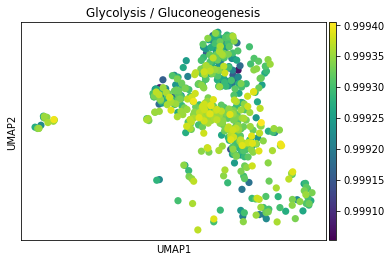

In [18]:
sc.pl.umap(sig_adata, color='Glycolysis / Gluconeogenesis')

In [19]:
help(sigc)

Help on package sigc:

NAME
    sigc

PACKAGE CONTENTS
    core

FUNCTIONS
    genesets2GeneSig(df: pandas.core.frame.DataFrame) -> Sequence[Type[ctxcore.genesig.GeneSignature]]
        Conver dataframe to GeneSig for AUCell. 
        
        :param df: A dataframe with columns ["name", "member", "description"].
                   name        member     description
                   signature1  gene1      signature1 description
                   signature1  gene2      signature1 description
                   signature2  gene4      signature2 description
        :return: GeneSignature list.
    
    metabolism_sigs(resources='KEGG') -> pandas.core.frame.DataFrame
        Get a set of default metabolism signature from KEGG or REACTOME. 
        :param resources: KEGG or REACTOME, default KEGG
    
    sigc_score(ex_mtx: pandas.core.frame.DataFrame, GeneSigs: pandas.core.frame.DataFrame, method='AUCell', num_workers=4) -> pandas.core.frame.DataFrame
        Get a set of signature scor